In [61]:
import pandas as pd
import numpy as np
DF = pd.read_csv(r'C:\Users\geosh\Desktop\python course\Invistico_Airline.csv')
print(DF)


        satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business     

In [62]:
DF.shape

(129880, 23)

In [63]:
DF.count()

satisfaction                         129880
Gender                               129880
Customer Type                        129880
Age                                  129880
Type of Travel                       129880
Class                                129880
Flight Distance                      129880
Seat comfort                         129880
Departure/Arrival time convenient    129880
Food and drink                       129880
Gate location                        129880
Inflight wifi service                129880
Inflight entertainment               129880
Online support                       129880
Ease of Online booking               129880
On-board service                     129880
Leg room service                     129880
Baggage handling                     129880
Checkin service                      129880
Cleanliness                          129880
Online boarding                      129880
Departure Delay in Minutes           129880
Arrival Delay in Minutes        

In [64]:
#vamoms a convetir 
#satisfaction column 
satisfaction_mapping = {"satisfied": 1, "dissatisfied": 0} 
DF['satisfaction'] = DF['satisfaction'].map(satisfaction_mapping) 

## Gender column - label encoding  
gender_mapping = {"Female": 1, "Male": 0}
DF['Gender'] = DF['Gender'].map(gender_mapping) 

## Customer type column - label encoding  
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
DF['Customer Type'] = DF['Customer Type'].map(customer_type_mapping) 

## Type of travel column - label encoding  
travel_type_mapping = {"Business travel": 2, "Personal Travel": 1}
DF['Type of Travel'] = DF['Type of Travel'].map(travel_type_mapping)  

## Class column - label encoding  
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
DF['Class'] = DF['Class'].map(class_mapping)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Class', ylabel='count'>

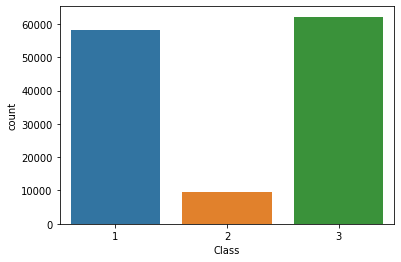

In [65]:
sns.countplot(x=DF['Class'])



<function matplotlib.pyplot.show(close=None, block=None)>

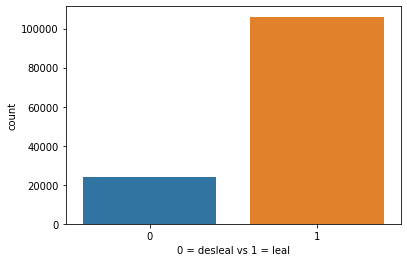

In [66]:

sns.countplot(x=DF['Customer Type'])
plt.xlabel('0 = desleal vs 1 = leal')
plt.show

Text(0.5, 0, '0 = insatisfecho vs 1 = satisfecho')

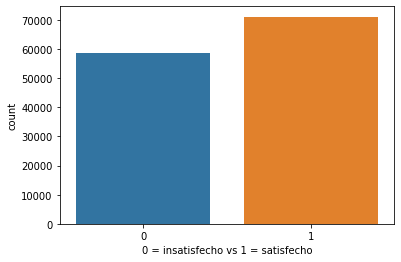

In [67]:

sns.countplot(x=DF['satisfaction'])
plt.xlabel('0 = insatisfecho vs 1 = satisfecho')


In [68]:
DF.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [69]:
X_data = DF.drop(columns=['satisfaction', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes','Age'])
X_data.head()

,Gender,Customer Type,Type of Travel,Class
0,1,1,1,1
1,0,1,1,3
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [70]:
y_satisfied = DF['satisfaction']
y_satisfied.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_satisfied, test_size = 0.3, random_state = 42)

In [72]:
#Vamos a realizar un analisis con un arbol de clasificacion
#debido a que la variable es dependiente 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_satisfied, test_size = 0.3, random_state = 42)

In [75]:
#modelo 

modelo = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
y_predict = modelo.predict(X_test)

In [77]:
matrix = confusion_matrix(y_test, y_predict)
print(matrix)

[[13213  4341]
 [ 4606 16804]]


<AxesSubplot:>

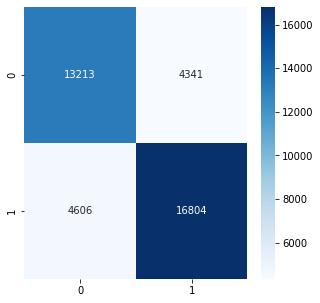

In [79]:
plt.figure(figsize =(5,5))
sns.heatmap(matrix, annot = True, fmt ='g', cmap = 'Blues')

In [80]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     17554
           1       0.79      0.78      0.79     21410

    accuracy                           0.77     38964
   macro avg       0.77      0.77      0.77     38964
weighted avg       0.77      0.77      0.77     38964



In [84]:
#vamos a ver nuestro modelo graficamente
export_graphviz(modelo, out_file = 'ModeloTree.dot', filled = True, feature_names =['Gender','Customer Type','Type of Travel','Class'])